In [240]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [241]:
maping = lambda x: torch.exp(-x)

In [242]:
X = torch.rand((100, 2), dtype=float)
Y = torch.sum(maping(X), dim=1)

In [243]:
X.shape, Y.shape

(torch.Size([100, 2]), torch.Size([100]))

In [244]:
class DenseLayer:
    def __init__(self, n_neurons, lr=5e-3):
        self.n_neurons = n_neurons
        self.has_initialized = False
        self.lr = lr
        
    def forwardPass(self, input_):
        if self.has_initialized is False:
            self.weights = torch.rand(self.n_neurons, input_.shape[1], dtype=float).requires_grad_()
            self.bias = torch.rand(torch.Size([]), dtype=float)
            self.input = input_
            self.has_initialized = True
        self.output = (self.weights @ self.input.T + self.bias).T
        
    def calcLoss(self, loss):
        self.loss = loss.calcLoss(self.output)
        
    def backPropogation(self):
        self.loss.backward(retain_graph=True)
        
    def update(self):
        self.weights.data -= self.weights.grad.data * self.lr
        self.weights.grad.zero_()

In [245]:
class MeanSquaredLoss:
    def __init__(self, y):
        self.y = y
    
    def calcLoss(self, pred_val):
        loss = F.mse_loss(pred_val, self.y).sqrt()
        print(f'Current Loss: {loss}')
        return loss

In [246]:
class Sequential:
    def __init__(self, layers, lossFn=MeanSquaredLoss):
        self.layers = layers
        self.layers_rev = layers[::-1]
        self.lossFn = lossFn
        
    def fit(self, x, y, no_of_epochs):
        history = dict({
            'loss':[]
        })
        for _ in range(no_of_epochs):
            for idx, layer in enumerate(self.layers):
                if idx == 0:
                    layer.forwardPass(x)
                else:
                    layer.forwardPass(self.layers[idx-1].output)
                    
            for idx, layer in enumerate(self.layers_rev):
                if idx == 0:
                    layer.calcLoss(self.lossFn(y))
                    history['loss'].append(layer.loss.item())
                    layer.backPropogation()
                
                layer.update()
            
        return history

In [247]:
Y = Y.reshape(Y.shape[0], 1)

In [248]:
model = Sequential([
    DenseLayer(4),
    DenseLayer(1),], lossFn = MeanSquaredLoss)

In [249]:
history = model.fit(X, Y, 400)

Current Loss: 2.884964508034756
Current Loss: 2.851610683743186
Current Loss: 2.8182705946276343
Current Loss: 2.7849447265658958
Current Loss: 2.7516335883296192
Current Loss: 2.718337712930173
Current Loss: 2.6850576590591744
Current Loss: 2.651794012631397
Current Loss: 2.618547388438517
Current Loss: 2.5853184319229303
Current Loss: 2.552107821081753
Current Loss: 2.518916268512087
Current Loss: 2.485744523609685
Current Loss: 2.452593374934352
Current Loss: 2.4194636527567113
Current Loss: 2.386356231802425
Current Loss: 2.3532720342115656
Current Loss: 2.3202120327326323
Current Loss: 2.287177254172682
Current Loss: 2.254168783127271
Current Loss: 2.2211877660163704
Current Loss: 2.1882354154551464
Current Loss: 2.1553130149915853
Current Loss: 2.122421924246341
Current Loss: 2.0895635844940172
Current Loss: 2.0567395247293594
Current Loss: 2.0239513682665944
Current Loss: 1.9912008399255188
Current Loss: 1.9584897738638996
Current Loss: 1.9258201221224562
Current Loss: 1.8931939

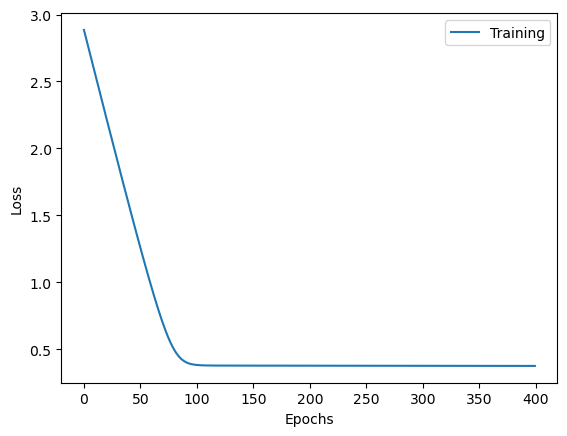

In [250]:
plt.plot(range(len(history['loss'])), history['loss'], label="Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best')